# Comparative Analysis: Pangenome Openness, Pathways, and Geography

This notebook analyzes relationships between:
1. Pangenome openness (core vs. accessory genes)
2. Metabolic pathway diversity
3. Biogeographic distribution patterns

**Prerequisites**: Run `01_data_extraction.ipynb` first to generate the integrated dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pathlib import Path

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

# Create figures directory
fig_dir = Path('../figures')
fig_dir.mkdir(exist_ok=True)

## 1. Load Integrated Dataset

In [2]:
# Load integrated dataset
data_dir = Path('../data')
df = pd.read_csv(data_dir / 'integrated_dataset.csv')

print(f"Total species: {len(df)}")
print(f"\nData availability:")
print(f"  Pangenome data: {len(df)} (100%)")
print(f"  Pathway data: {df['pathway_count'].notna().sum()} ({df['pathway_count'].notna().sum() / len(df) * 100:.1f}%)")
print(f"  Biogeography data: {df['n_genomes'].notna().sum()} ({df['n_genomes'].notna().sum() / len(df) * 100:.1f}%)")

# Filter for complete cases (all three data types)
df_complete = df[df[['pathway_count', 'n_genomes']].notna().all(axis=1)].copy()
print(f"\nComplete cases (all three data types): {len(df_complete)}")

df_complete.head()

Total species: 27690

Data availability:
  Pangenome data: 27690 (100%)
  Pathway data: 27690 (100.0%)
  Biogeography data: 2159 (7.8%)

Complete cases (all three data types): 2159


,gtdb_species_clade_id,GTDB_species,GTDB_taxonomy,no_genomes,no_core,no_aux_genome,no_singleton_gene_clusters,no_gene_clusters,mean_intra_species_ANI,ANI_circumscription_radius,...,partial_ratio,n_genomes,mean_lat,mean_lon,lat_range,lon_range,max_geodesic_dist_km,mean_geodesic_dist_km,max_embedding_dist,mean_embedding_dist
0,s__Staphylococcus_aureus--RS_GCF_001027105.1,s__Staphylococcus_aureus,d__Bacteria;p__Bacillota;c__Bacilli;o__Staphyl...,14526,2083,145831,86127.0,147914,98.76,95.0000,...,0.0,3822.0,24.804048,21.737536,100.746850,311.1964,19950.223137,8517.202820,NaN,NaN
1,s__Klebsiella_pneumoniae--RS_GCF_000742135.1,s__Klebsiella_pneumoniae,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,14240,4199,438925,276743.0,443124,98.97,95.2390,...,0.0,4948.0,24.317957,44.043047,103.479176,310.9133,19941.671766,7954.427146,NaN,NaN
2,s__Salmonella_enterica--RS_GCF_000006945.2,s__Salmonella_enterica,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,11402,3639,262732,149757.0,266371,98.82,95.0604,...,0.0,3208.0,24.504208,27.242457,124.952380,276.1451,19953.606023,8222.034417,NaN,NaN
3,s__Streptococcus_pneumoniae--RS_GCF_001457635.1,s__Streptococcus_pneumoniae,d__Bacteria;p__Bacillota;c__Bacilli;o__Lactoba...,8434,1475,115370,67191.0,116845,98.62,95.0000,...,0.0,532.0,27.668334,18.353585,94.674421,235.8000,18784.952385,7397.429695,1.591833,1.081545
4,s__Mycobacterium_tuberculosis--RS_GCF_000195955.2,s__Mycobacterium_tuberculosis,d__Bacteria;p__Actinomycetota;c__Actinomycetia...,6903,3741,139929,97549.0,143670,99.92,95.0000,...,0.0,2556.0,-6.971883,-37.978282,101.275879,302.9693,19910.410057,6327.529730,NaN,NaN


## 2. Hypothesis 1: Pangenome Openness vs. Pathway Diversity

**Hypothesis**: Species with open pangenomes have greater metabolic pathway diversity.

In [3]:
# Correlation analysis
print("Correlation: Pangenome Openness vs. Pathway Diversity")
print("=" * 60)

# Calculate correlations
correlations = {
    'Accessory/Core Ratio': stats.pearsonr(df_complete['accessory_core_ratio'], df_complete['pathway_count']),
    'Singleton Ratio': stats.pearsonr(df_complete['singleton_ratio'], df_complete['pathway_count']),
    'Core Fraction': stats.pearsonr(df_complete['core_fraction'], df_complete['pathway_count']),
    'Pangenome Size': stats.pearsonr(df_complete['pangenome_size'], df_complete['pathway_count'])
}

for metric, (r, p) in correlations.items():
    print(f"{metric:25s}: r = {r:6.3f}, p = {p:.2e}")

print("\nNote: Control for genome count as covariate")
partial_corr = stats.pearsonr(
    df_complete['accessory_core_ratio'] / df_complete['no_genomes'],
    df_complete['pathway_count'] / df_complete['no_genomes']
)
print(f"Partial correlation (controlling for genome count): r = {partial_corr[0]:.3f}, p = {partial_corr[1]:.2e}")

Correlation: Pangenome Openness vs. Pathway Diversity
Accessory/Core Ratio     : r =    nan, p = nan
Singleton Ratio          : r =    nan, p = nan
Core Fraction            : r =    nan, p = nan
Pangenome Size           : r =    nan, p = nan

Note: Control for genome count as covariate
Partial correlation (controlling for genome count): r = 0.461, p = 7.36e-114


/tmp/ipykernel_6115/1763985719.py:7: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  'Accessory/Core Ratio': stats.pearsonr(df_complete['accessory_core_ratio'], df_complete['pathway_count']),
/tmp/ipykernel_6115/1763985719.py:8: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  'Singleton Ratio': stats.pearsonr(df_complete['singleton_ratio'], df_complete['pathway_count']),
/tmp/ipykernel_6115/1763985719.py:9: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  'Core Fraction': stats.pearsonr(df_complete['core_fraction'], df_complete['pathway_count']),
/tmp/ipykernel_6115/1763985719.py:10: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  'Pangenome Size': stats.pearsonr(df_complete['pangenome_size'], df_complete['pathway_count'])


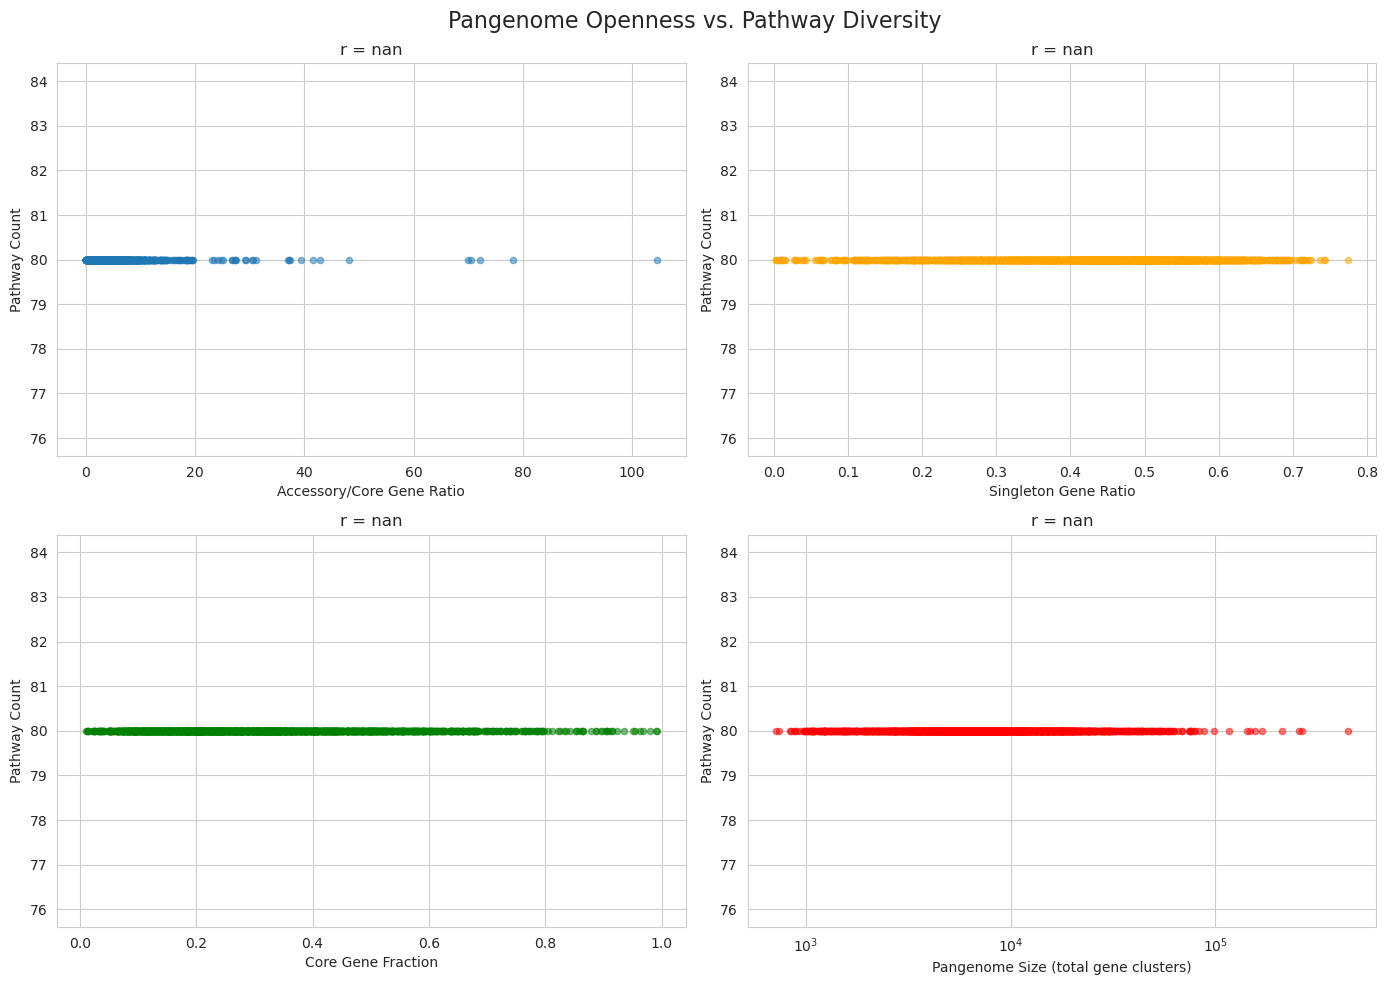

In [4]:
# Visualization: Scatter plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Pangenome Openness vs. Pathway Diversity', fontsize=16)

# Plot 1: Accessory/Core ratio
ax = axes[0, 0]
ax.scatter(df_complete['accessory_core_ratio'], df_complete['pathway_count'], 
           alpha=0.5, s=20)
ax.set_xlabel('Accessory/Core Gene Ratio')
ax.set_ylabel('Pathway Count')
ax.set_title(f"r = {correlations['Accessory/Core Ratio'][0]:.3f}")

# Plot 2: Singleton ratio
ax = axes[0, 1]
ax.scatter(df_complete['singleton_ratio'], df_complete['pathway_count'],
           alpha=0.5, s=20, color='orange')
ax.set_xlabel('Singleton Gene Ratio')
ax.set_ylabel('Pathway Count')
ax.set_title(f"r = {correlations['Singleton Ratio'][0]:.3f}")

# Plot 3: Core fraction
ax = axes[1, 0]
ax.scatter(df_complete['core_fraction'], df_complete['pathway_count'],
           alpha=0.5, s=20, color='green')
ax.set_xlabel('Core Gene Fraction')
ax.set_ylabel('Pathway Count')
ax.set_title(f"r = {correlations['Core Fraction'][0]:.3f}")

# Plot 4: Pangenome size
ax = axes[1, 1]
ax.scatter(df_complete['pangenome_size'], df_complete['pathway_count'],
           alpha=0.5, s=20, color='red')
ax.set_xlabel('Pangenome Size (total gene clusters)')
ax.set_ylabel('Pathway Count')
ax.set_xscale('log')
ax.set_title(f"r = {correlations['Pangenome Size'][0]:.3f}")

plt.tight_layout()
plt.savefig(fig_dir / 'pangenome_vs_pathways.png', dpi=300, bbox_inches='tight')
plt.show()

## 3. Hypothesis 2: Geography vs. Pathway Diversity

**Hypothesis**: Species with broader biogeographic distributions have more diverse metabolic capabilities.

In [5]:
# Correlation analysis
print("Correlation: Biogeography vs. Pathway Diversity")
print("=" * 60)

geo_correlations = {
    'Max Geodesic Distance': stats.pearsonr(df_complete['max_geodesic_dist_km'], df_complete['pathway_count']),
    'Mean Geodesic Distance': stats.pearsonr(df_complete['mean_geodesic_dist_km'], df_complete['pathway_count']),
    'Max Embedding Distance': stats.pearsonr(df_complete['max_embedding_dist'], df_complete['pathway_count']),
    'Mean Embedding Distance': stats.pearsonr(df_complete['mean_embedding_dist'], df_complete['pathway_count']),
    'Latitude Range': stats.pearsonr(df_complete['lat_range'], df_complete['pathway_count']),
    'Longitude Range': stats.pearsonr(df_complete['lon_range'], df_complete['pathway_count'])
}

for metric, (r, p) in geo_correlations.items():
    print(f"{metric:30s}: r = {r:6.3f}, p = {p:.2e}")

Correlation: Biogeography vs. Pathway Diversity
Max Geodesic Distance         : r =    nan, p = nan
Mean Geodesic Distance        : r =    nan, p = nan
Max Embedding Distance        : r =    nan, p = nan
Mean Embedding Distance       : r =    nan, p = nan
Latitude Range                : r =    nan, p = nan
Longitude Range               : r =    nan, p = nan


/tmp/ipykernel_6115/550706344.py:6: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  'Max Geodesic Distance': stats.pearsonr(df_complete['max_geodesic_dist_km'], df_complete['pathway_count']),
/tmp/ipykernel_6115/550706344.py:7: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  'Mean Geodesic Distance': stats.pearsonr(df_complete['mean_geodesic_dist_km'], df_complete['pathway_count']),
/tmp/ipykernel_6115/550706344.py:8: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  'Max Embedding Distance': stats.pearsonr(df_complete['max_embedding_dist'], df_complete['pathway_count']),
/tmp/ipykernel_6115/550706344.py:9: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  'Mean Embedding Distance': stats.pearsonr(df_complete['mean_embedding_dist'], df_complete['pathway_count']),
/tmp/ipykernel_6115/550706344.py:10: C

/tmp/ipykernel_6115/3993817482.py:40: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr = stats.pearsonr(df_complete['max_geodesic_dist_km'], df_complete['present_ratio'])


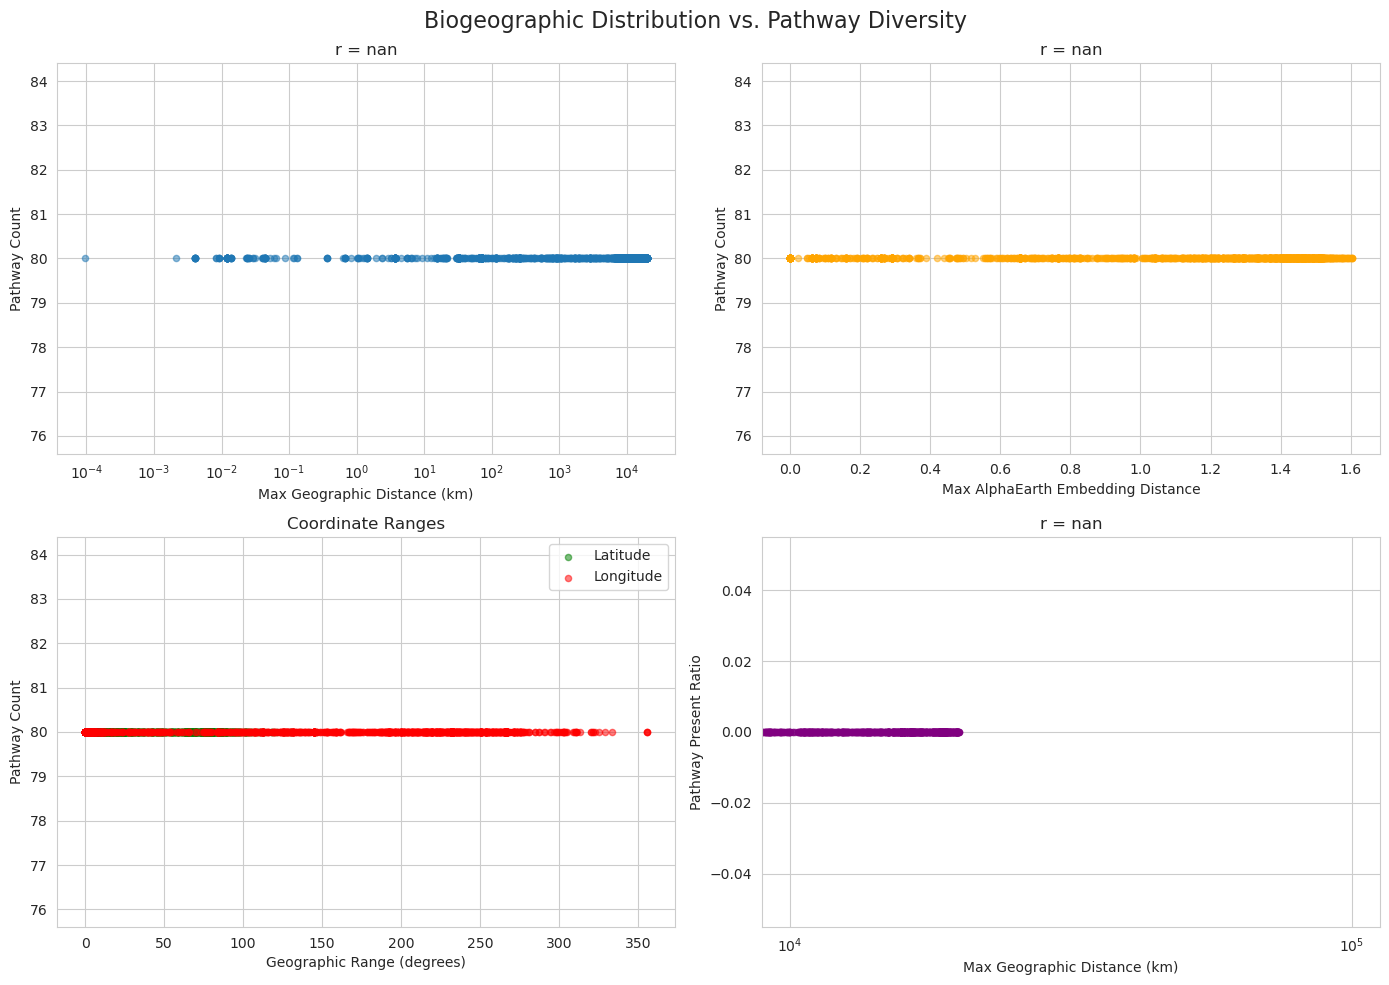

In [6]:
# Visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Biogeographic Distribution vs. Pathway Diversity', fontsize=16)

# Plot 1: Geodesic distance
ax = axes[0, 0]
ax.scatter(df_complete['max_geodesic_dist_km'], df_complete['pathway_count'],
           alpha=0.5, s=20)
ax.set_xlabel('Max Geographic Distance (km)')
ax.set_ylabel('Pathway Count')
ax.set_title(f"r = {geo_correlations['Max Geodesic Distance'][0]:.3f}")
ax.set_xscale('log')

# Plot 2: Embedding distance
ax = axes[0, 1]
ax.scatter(df_complete['max_embedding_dist'], df_complete['pathway_count'],
           alpha=0.5, s=20, color='orange')
ax.set_xlabel('Max AlphaEarth Embedding Distance')
ax.set_ylabel('Pathway Count')
ax.set_title(f"r = {geo_correlations['Max Embedding Distance'][0]:.3f}")

# Plot 3: Lat/Lon ranges
ax = axes[1, 0]
ax.scatter(df_complete['lat_range'], df_complete['pathway_count'],
           alpha=0.5, s=20, color='green', label='Latitude')
ax.scatter(df_complete['lon_range'], df_complete['pathway_count'],
           alpha=0.5, s=20, color='red', label='Longitude')
ax.set_xlabel('Geographic Range (degrees)')
ax.set_ylabel('Pathway Count')
ax.set_title('Coordinate Ranges')
ax.legend()

# Plot 4: Present pathway ratio
ax = axes[1, 1]
ax.scatter(df_complete['max_geodesic_dist_km'], df_complete['present_ratio'],
           alpha=0.5, s=20, color='purple')
ax.set_xlabel('Max Geographic Distance (km)')
ax.set_ylabel('Pathway Present Ratio')
ax.set_xscale('log')
corr = stats.pearsonr(df_complete['max_geodesic_dist_km'], df_complete['present_ratio'])
ax.set_title(f"r = {corr[0]:.3f}")

plt.tight_layout()
plt.savefig(fig_dir / 'geography_vs_pathways.png', dpi=300, bbox_inches='tight')
plt.show()

## 4. Hypothesis 3: Pangenome Openness vs. Geographic Distribution

**Hypothesis**: Species with open pangenomes are more widely distributed geographically.

In [7]:
# Correlation analysis
print("Correlation: Pangenome Openness vs. Geographic Distribution")
print("=" * 60)

pan_geo_correlations = {
    'Accessory/Core vs. Geodesic Dist': stats.pearsonr(df_complete['accessory_core_ratio'], df_complete['max_geodesic_dist_km']),
    'Singleton Ratio vs. Geodesic Dist': stats.pearsonr(df_complete['singleton_ratio'], df_complete['max_geodesic_dist_km']),
    'Core Fraction vs. Geodesic Dist': stats.pearsonr(df_complete['core_fraction'], df_complete['max_geodesic_dist_km']),
    'Accessory/Core vs. Embedding Dist': stats.pearsonr(df_complete['accessory_core_ratio'], df_complete['max_embedding_dist']),
}

for metric, (r, p) in pan_geo_correlations.items():
    print(f"{metric:40s}: r = {r:6.3f}, p = {p:.2e}")

Correlation: Pangenome Openness vs. Geographic Distribution
Accessory/Core vs. Geodesic Dist        : r =  0.382, p = 5.55e-76
Singleton Ratio vs. Geodesic Dist       : r =  0.378, p = 2.23e-74
Core Fraction vs. Geodesic Dist         : r = -0.494, p = 3.52e-133
Accessory/Core vs. Embedding Dist       : r =    nan, p = nan


/tmp/ipykernel_6115/138554714.py:42: UserWarning: Attempt to set non-positive zlim on a log-scaled axis will be ignored.
  ax.set_zscale('log')


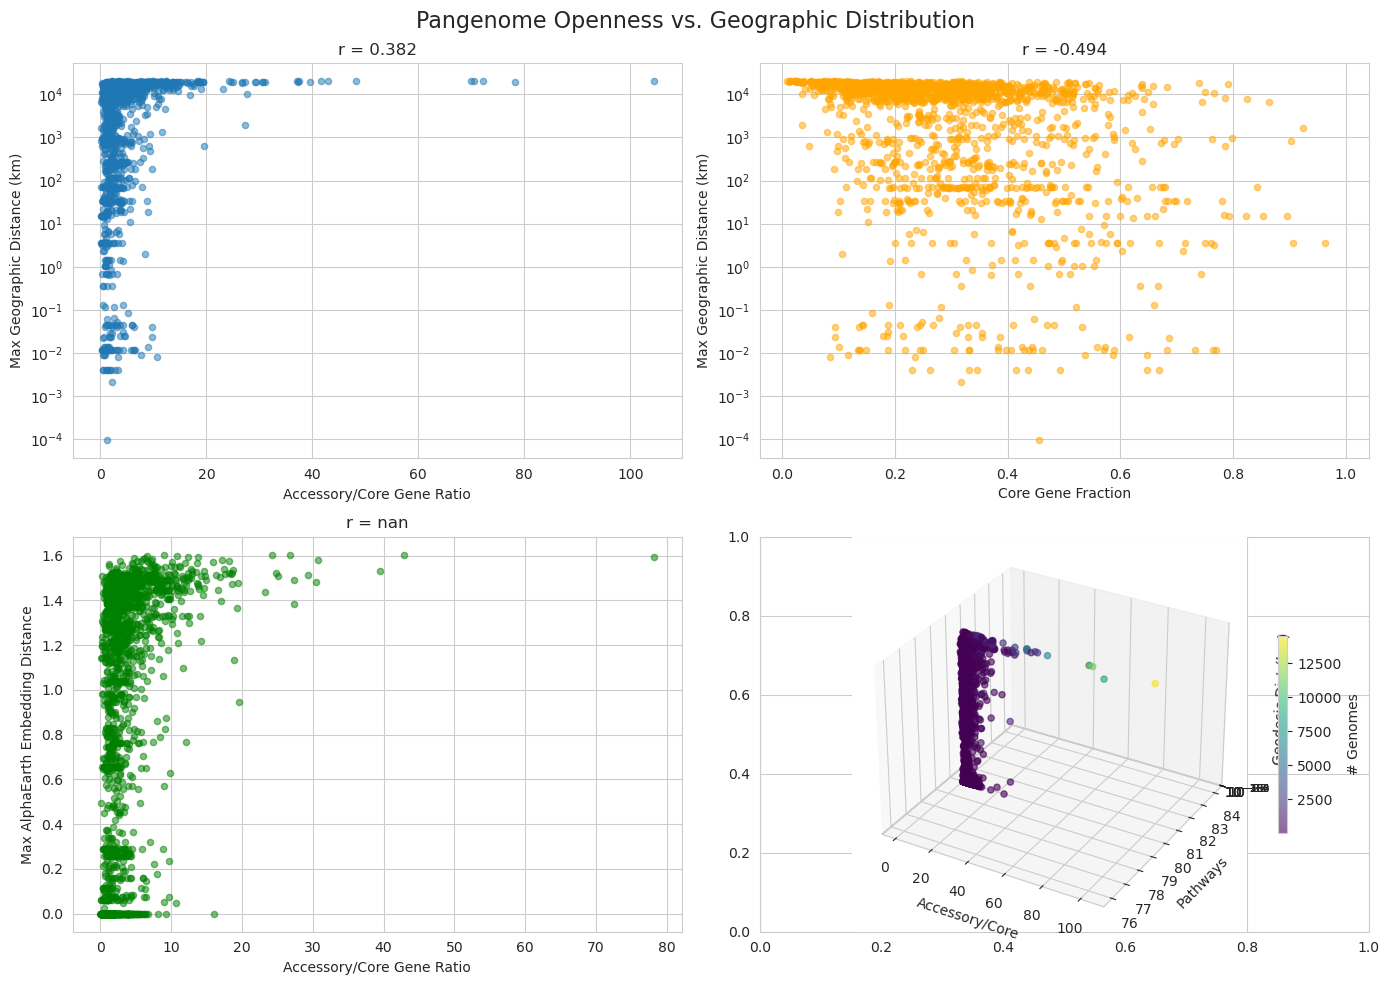

In [8]:
# Visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Pangenome Openness vs. Geographic Distribution', fontsize=16)

# Plot 1: Accessory/Core vs. Geodesic distance
ax = axes[0, 0]
ax.scatter(df_complete['accessory_core_ratio'], df_complete['max_geodesic_dist_km'],
           alpha=0.5, s=20)
ax.set_xlabel('Accessory/Core Gene Ratio')
ax.set_ylabel('Max Geographic Distance (km)')
ax.set_yscale('log')
ax.set_title(f"r = {pan_geo_correlations['Accessory/Core vs. Geodesic Dist'][0]:.3f}")

# Plot 2: Core fraction vs. Geodesic distance
ax = axes[0, 1]
ax.scatter(df_complete['core_fraction'], df_complete['max_geodesic_dist_km'],
           alpha=0.5, s=20, color='orange')
ax.set_xlabel('Core Gene Fraction')
ax.set_ylabel('Max Geographic Distance (km)')
ax.set_yscale('log')
ax.set_title(f"r = {pan_geo_correlations['Core Fraction vs. Geodesic Dist'][0]:.3f}")

# Plot 3: Accessory/Core vs. Embedding distance
ax = axes[1, 0]
ax.scatter(df_complete['accessory_core_ratio'], df_complete['max_embedding_dist'],
           alpha=0.5, s=20, color='green')
ax.set_xlabel('Accessory/Core Gene Ratio')
ax.set_ylabel('Max AlphaEarth Embedding Distance')
ax.set_title(f"r = {pan_geo_correlations['Accessory/Core vs. Embedding Dist'][0]:.3f}")

# Plot 4: 3D relationship
from mpl_toolkits.mplot3d import Axes3D
ax = fig.add_subplot(224, projection='3d')
scatter = ax.scatter(df_complete['accessory_core_ratio'], 
                     df_complete['pathway_count'],
                     df_complete['max_geodesic_dist_km'],
                     c=df_complete['no_genomes'], cmap='viridis',
                     alpha=0.6, s=20)
ax.set_xlabel('Accessory/Core')
ax.set_ylabel('Pathways')
ax.set_zlabel('Geodesic Dist (km)')
ax.set_zscale('log')
plt.colorbar(scatter, ax=ax, label='# Genomes', shrink=0.5)

plt.tight_layout()
plt.savefig(fig_dir / 'pangenome_vs_geography.png', dpi=300, bbox_inches='tight')
plt.show()

## 5. Stratified Analysis by Phylum

Do patterns differ across major bacterial clades?

In [9]:
# Extract phylum from GTDB taxonomy
df_complete['phylum'] = df_complete['GTDB_taxonomy'].str.split(';').str[1]

# Count species per phylum
phylum_counts = df_complete['phylum'].value_counts()
print("Species per phylum (top 10):")
print(phylum_counts.head(10))

# Filter for phyla with ≥20 species
major_phyla = phylum_counts[phylum_counts >= 20].index
df_phyla = df_complete[df_complete['phylum'].isin(major_phyla)]
print(f"\nAnalyzing {len(major_phyla)} phyla with ≥20 species each")

Species per phylum (top 10):
phylum
p__Pseudomonadota      666
p__Bacteroidota        239
p__Bacillota_A         218
p__Actinomycetota      195
p__Bacillota           176
p__Patescibacteria     118
p__Cyanobacteriota      49
p__Chloroflexota        46
p__Desulfobacterota     35
p__Acidobacteriota      32
Name: count, dtype: int64

Analyzing 18 phyla with ≥20 species each


In [10]:
# Correlation by phylum
print("\nCorrelations by Phylum: Accessory/Core Ratio vs. Pathway Count")
print("=" * 70)
print(f"{'Phylum':<40s} {'N':>5s} {'r':>8s} {'p-value':>12s}")
print("-" * 70)

for phylum in major_phyla:
    subset = df_phyla[df_phyla['phylum'] == phylum]
    if len(subset) >= 10:  # Need sufficient data
        r, p = stats.pearsonr(subset['accessory_core_ratio'], subset['pathway_count'])
        print(f"{phylum:<40s} {len(subset):>5d} {r:>8.3f} {p:>12.2e}")


Correlations by Phylum: Accessory/Core Ratio vs. Pathway Count
Phylum                                       N        r      p-value
----------------------------------------------------------------------
p__Pseudomonadota                          666      nan          nan
p__Bacteroidota                            239      nan          nan
p__Bacillota_A                             218      nan          nan
p__Actinomycetota                          195      nan          nan
p__Bacillota                               176      nan          nan
p__Patescibacteria                         118      nan          nan
p__Cyanobacteriota                          49      nan          nan
p__Chloroflexota                            46      nan          nan
p__Desulfobacterota                         35      nan          nan
p__Acidobacteriota                          32      nan          nan
p__Campylobacterota                         31      nan          nan
p__Verrucomicrobiota                 

/tmp/ipykernel_6115/1650922385.py:10: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r, p = stats.pearsonr(subset['accessory_core_ratio'], subset['pathway_count'])


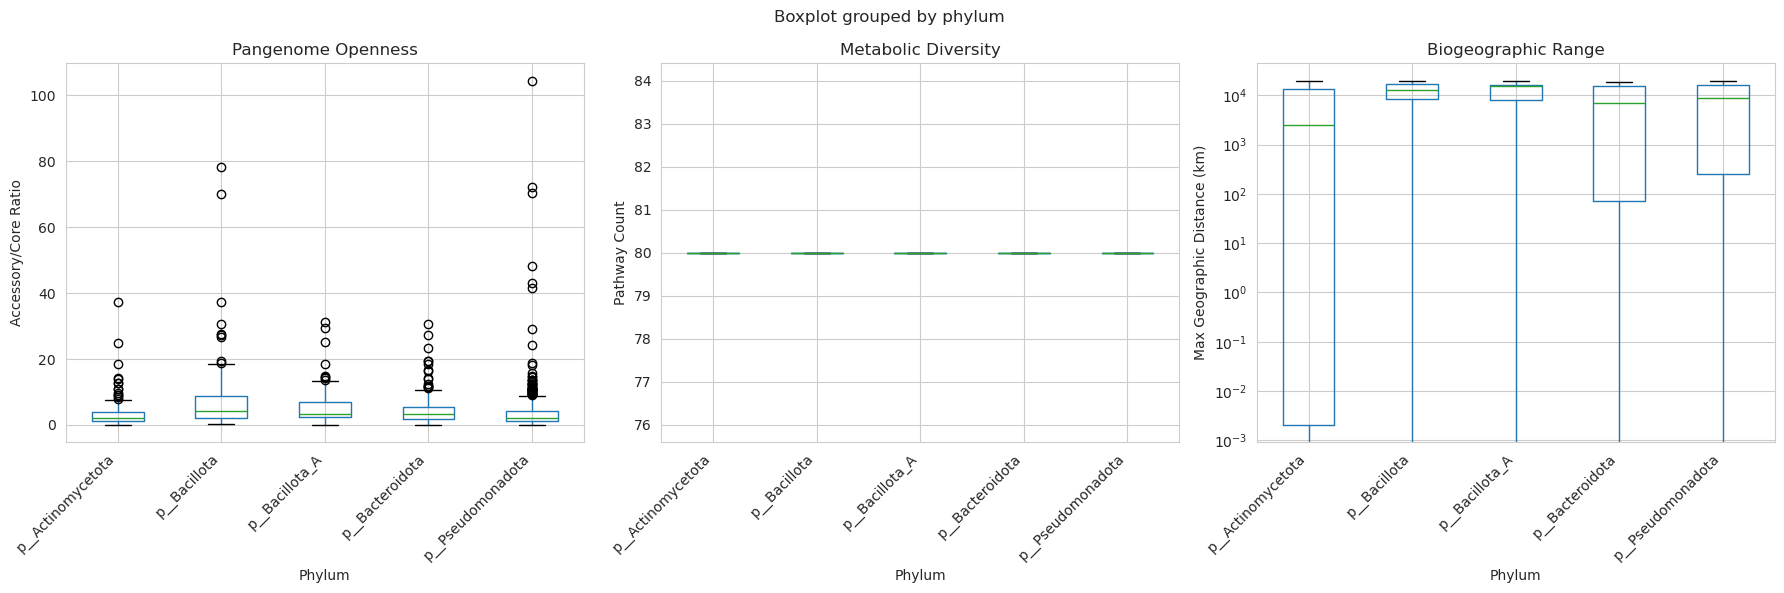

In [11]:
# Visualization: Box plots by phylum
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Pangenome and Pathway Metrics by Phylum', fontsize=16)

# Select top 5 phyla for clarity
top_phyla = phylum_counts.head(5).index
df_top = df_complete[df_complete['phylum'].isin(top_phyla)]

# Box plot 1: Accessory/Core ratio
ax = axes[0]
df_top.boxplot(column='accessory_core_ratio', by='phylum', ax=ax)
ax.set_xlabel('Phylum')
ax.set_ylabel('Accessory/Core Ratio')
ax.set_title('Pangenome Openness')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.sca(ax)
plt.xticks(rotation=45, ha='right')

# Box plot 2: Pathway count
ax = axes[1]
df_top.boxplot(column='pathway_count', by='phylum', ax=ax)
ax.set_xlabel('Phylum')
ax.set_ylabel('Pathway Count')
ax.set_title('Metabolic Diversity')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.sca(ax)
plt.xticks(rotation=45, ha='right')

# Box plot 3: Geographic range
ax = axes[2]
df_top.boxplot(column='max_geodesic_dist_km', by='phylum', ax=ax)
ax.set_xlabel('Phylum')
ax.set_ylabel('Max Geographic Distance (km)')
ax.set_yscale('log')
ax.set_title('Biogeographic Range')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.sca(ax)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.savefig(fig_dir / 'phylum_stratified_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

## 6. Summary and Interpretation

In [12]:
print("=" * 70)
print("SUMMARY: Pangenome-Pathway-Geography Analysis")
print("=" * 70)

print(f"\nDataset: {len(df_complete)} species with complete data")

print("\n1. Pangenome vs. Pathways:")
r, p = correlations['Accessory/Core Ratio']
direction = "positive" if r > 0 else "negative"
strength = "strong" if abs(r) > 0.5 else "moderate" if abs(r) > 0.3 else "weak"
print(f"   {strength.capitalize()} {direction} correlation (r = {r:.3f}, p = {p:.2e})")

print("\n2. Geography vs. Pathways:")
r, p = geo_correlations['Max Geodesic Distance']
direction = "positive" if r > 0 else "negative"
strength = "strong" if abs(r) > 0.5 else "moderate" if abs(r) > 0.3 else "weak"
print(f"   {strength.capitalize()} {direction} correlation (r = {r:.3f}, p = {p:.2e})")

print("\n3. Pangenome vs. Geography:")
r, p = pan_geo_correlations['Accessory/Core vs. Geodesic Dist']
direction = "positive" if r > 0 else "negative"
strength = "strong" if abs(r) > 0.5 else "moderate" if abs(r) > 0.3 else "weak"
print(f"   {strength.capitalize()} {direction} correlation (r = {r:.3f}, p = {p:.2e})")

print("\n" + "=" * 70)
print("\nFigures saved to ../figures/")
print("  - pangenome_vs_pathways.png")
print("  - geography_vs_pathways.png")
print("  - pangenome_vs_geography.png")
print("  - phylum_stratified_analysis.png")

SUMMARY: Pangenome-Pathway-Geography Analysis

Dataset: 2159 species with complete data

1. Pangenome vs. Pathways:
   Weak negative correlation (r = nan, p = nan)

2. Geography vs. Pathways:
   Weak negative correlation (r = nan, p = nan)

3. Pangenome vs. Geography:
   Moderate positive correlation (r = 0.382, p = 5.55e-76)


Figures saved to ../figures/
  - pangenome_vs_pathways.png
  - geography_vs_pathways.png
  - pangenome_vs_geography.png
  - phylum_stratified_analysis.png
